In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import os
from PIL import Image
np.random.seed(1000)

In [11]:
image_dir= 'cell_images/'
SIZE=64
dataset=[]
label=[]
infected_images = os.listdir(image_dir+'Parasitized/')
# reads in images and adds to dataset
#infected
for i, image_name in enumerate(infected_images):
    if (image_name.split('.')[1] == 'png'):
        image=cv2.imread(image_dir+'Parasitized/'+image_name)
        image= Image.fromarray(image,'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(0)

#uninfected 
uninfected_images = os.listdir(image_dir+'Uninfected/')
       
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image=cv2.imread(image_dir+'Uninfected/'+image_name)
        image= Image.fromarray(image,'RGB')
        image = image.resize((SIZE,SIZE))
        dataset.append(np.array(image))
        label.append(1)

#split dataset
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)


In [12]:
# forming the neural network

model = None
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape = (SIZE, SIZE, 3), activation = 'relu', data_format='channels_last'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Convolution2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2), data_format="channels_last"))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(activation = 'relu', units=512))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'relu', units=256))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))
model.add(Dense(activation = 'sigmoid', units=2))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 14, 14, 32)       

Epoch 1/25
311/311 [==============================] - 56s 175ms/step - loss: 0.4815 - accuracy: 0.7941 - val_loss: 0.7466 - val_accuracy: 0.8381
Epoch 2/25
311/311 [==============================] - 54s 172ms/step - loss: 0.2225 - accuracy: 0.9185 - val_loss: 0.2475 - val_accuracy: 0.9175
Epoch 3/25
311/311 [==============================] - 59s 191ms/step - loss: 0.1893 - accuracy: 0.9338 - val_loss: 0.1868 - val_accuracy: 0.9351
Epoch 4/25
311/311 [==============================] - 59s 188ms/step - loss: 0.1617 - accuracy: 0.9425 - val_loss: 0.2035 - val_accuracy: 0.9234
Epoch 5/25
311/311 [==============================] - 51s 164ms/step - loss: 0.1466 - accuracy: 0.9460 - val_loss: 0.2315 - val_accuracy: 0.9270
Epoch 6/25
311/311 [==============================] - 47s 151ms/step - loss: 0.1274 - accuracy: 0.9546 - val_loss: 0.1632 - val_accuracy: 0.9410
Epoch 7/25
311/311 [==============================] - 46s 148ms/step - loss: 0.1127 - accuracy: 0.9610 - val_loss: 0.1921 - val_ac

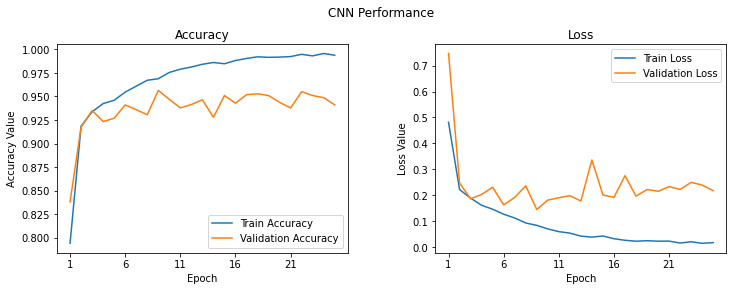

In [13]:
history = model.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 25,     
                         validation_split = 0.1,
                         shuffle = False
                      #   callbacks=callbacks
                     )

# ## Accuracy calculation
# 
# I'll now calculate the accuracy on the test data.

print("Test_Accuracy: {:.2f}%".format(model.evaluate(np.array(X_test), np.array(y_test))[1]*100))




f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(history.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")
